In [1]:
# Importamos las librerías a utilizar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de Viviendas y Población en Argentina

In [2]:
df = pd.read_excel('datasets/poblacion.xlsx')
df.head()

,Provincia,Viviendas,Población
0,CABA,1638764,3120612
1,Buenos Aires,6695273,17569053
2,Catamarca,158989,429556
3,Chaco,401658,1142963
4,Chubut,236010,603120


In [3]:
# Normalizamos los nombres de las provincias
df['Provincia'] = df['Provincia'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()

# Escalar las cantidades a miles
df.loc[:, 'Viviendas'] = df['Viviendas'] / 1000000
df.loc[:, 'Población'] = df['Población'] / 1000000

### Graficamos

In [4]:
def graficar_top_n_sin_provincia(df, n_filas, provincia_excluir):
    # Crear una figura con dos subgráficos uno al lado del otro
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Generar colores comunes para ambas gráficas
    colors_common = plt.cm.viridis(np.linspace(0, 1, n_filas))

    # Gráfico de viviendas
    df_viviendas_sorted = df[df['Provincia'] != provincia_excluir].sort_values(by='Viviendas', ascending=False)
    df_top_n_viviendas = df_viviendas_sorted.head(n_filas)
    axs[0].bar(df_top_n_viviendas['Provincia'], df_top_n_viviendas['Viviendas'], color=colors_common)
    axs[0].set_xlabel('Provincias')
    axs[0].set_ylabel('Viviendas (millones)')
    axs[0].set_title(f'Top {n_filas} Provincias con Mayor Cantidad de Viviendas')
    axs[0].grid(False)
    axs[0].invert_xaxis()
    axs[0].tick_params(axis='x', rotation=45)  # Cambiado de ha='right' a rotation=45

    # Gráfico de población
    df_poblacion_sorted = df[df['Provincia'] != provincia_excluir].sort_values(by='Población', ascending=False)
    df_top_n_poblacion = df_poblacion_sorted.head(n_filas)
    axs[1].bar(df_top_n_poblacion['Provincia'], df_top_n_poblacion['Población'], color=colors_common)
    axs[1].set_xlabel('Provincias')
    axs[1].set_ylabel('Población (millones)')
    axs[1].set_title(f'Top {n_filas} Provincias con Mayor Cantidad de Población')
    axs[1].grid(False)
    axs[1].invert_xaxis()
    axs[1].tick_params(axis='x', rotation=45)  # Cambiado de ha='right' a rotation=45

    # Ajustar el espacio entre subgráficos
    plt.tight_layout()

    # Mostrar la figura
    plt.show()

## Análisis de Conectividad de Internet en Argentina

Este gráfico presenta información sobre las provincias argentinas con la mayor cantidad de viviendas y población. Analizar estos datos nos proporcionará un panorama más claro al evaluar la conectividad de internet en el país.

### Datos Destacados:
- **Viviendas:** Se muestra la cantidad de viviendas en cada provincia.
- **Población:** Se destaca la cantidad de habitantes en cada provincia.

La correlación entre estos dos factores nos ayudará a comprender mejor la distribución de la población y las viviendas, informando así nuestra comprensión sobre la infraestructura de conectividad en Argentina.

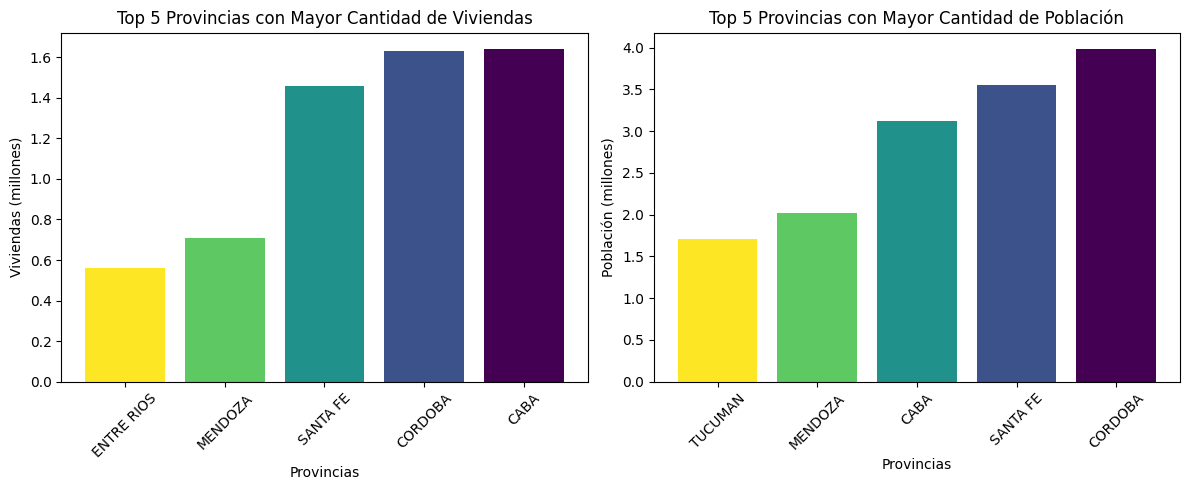

In [5]:
# Graficamos!
graficar_top_n_sin_provincia(df, n_filas=5, provincia_excluir='BUENOS AIRES')

# 01 - Conectividad en Provincias

In [6]:
df1 = pd.read_csv('datasets/listado_localidades_conConectividad_Internet.csv')
df1.head()

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),SI,--,--,--,SI,SI,SI,--,--
1,BUENOS AIRES,9 de Julio,Carlos María Naón,--,--,--,--,SI,SI,SI,--,--
2,BUENOS AIRES,9 de Julio,Dudignac,--,--,SI,--,SI,SI,SI,SI,--
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),--,--,--,--,SI,--,--,--,--
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),SI,--,--,SI,SI,SI,SI,--,--


### Duplicados

In [7]:
# Verificamos duplicados en el DataFrame
df_duplicados = df1.duplicated().any()

# Imprimir el resultado
print("¿Hay duplicados en el DataFrame?:", df_duplicados)

# Si hay duplicados, mostrar las filas duplicadas y eliminarlos del DataFrame
if df_duplicados:
    duplicated_rows = df1[df1.duplicated()]
    print("Filas duplicadas:")
    print(duplicated_rows)
    
    # Eliminamos los duplicados del DataFrame
    df1 = df1.drop_duplicates()
    print("Duplicados eliminados. DataFrame actualizado.")
else:
    print("No hay duplicados en el DataFrame.")

¿Hay duplicados en el DataFrame?: True
Filas duplicadas:
         Provincia    Partido     Localidad ADSL Cablemódem Dial Up  \
353   BUENOS AIRES   La Plata  ruta del sol   SI         --      --   
3442       TUCUMAN  Cruz Alta      Lastenia   --         --      --   

     Fibra óptica  4G  3G Telefonía Fija Wireless Satelital  
353            SI  SI  SI             SI       --        --  
3442           --  SI  SI             --       --        --  
Duplicados eliminados. DataFrame actualizado.


In [8]:
# Verificamos duplicados con respecto a las columnas 'Provincia', 'Partido' y 'Localidad'

# Normalizamos las columnas
df1['Provincia'] = df1['Provincia'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()
df1['Partido'] = df1['Partido'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()
df1['Localidad'] = df1['Localidad'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()

# Verificamos duplicados basándose en las columnas normalizadas
duplicados = df1.duplicated(subset=['Provincia', 'Partido', 'Localidad'])

# Mostramos las filas duplicadas, si es que las hay.
filas_duplicadas = df1[duplicados]
filas_duplicadas

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
2418,ENTRE RIOS,COLON,HOCKER,--,--,--,--,SI,--,--,SI,SI
2863,LA RIOJA,SANAGASTA,VILLA SANAGASTA,--,SI,--,SI,SI,SI,SI,SI,SI
3225,MENDOZA,GUAYMALLEN,COLONIA SEGOVIA,--,--,--,SI,SI,SI,--,SI,--
3813,ENTRE RIOS,PARANA,EL RAMBLON,--,--,--,--,SI,--,--,SI,--


In [9]:
# Hemos encontrado duplicados con respecto a las columnas señaladas.

# Procedemos a consilidar las filas duplicadas
df1 = df1.groupby(['Provincia', 'Partido', 'Localidad'], as_index=False).agg(lambda x: ','.join(x.unique()))

# Verificamos lo consolidado
df1[(df1['Provincia'] == 'LA RIOJA') & (df1['Partido'] == 'SANAGASTA') & 
               (df1['Localidad'] == 'VILLA SANAGASTA')]

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
2539,LA RIOJA,SANAGASTA,VILLA SANAGASTA,--,"--,SI",--,"--,SI",SI,SI,"--,SI","--,SI","--,SI"


### Reemplazo de valores

In [10]:
# Definimos lo que vamos a reemplazar
reemplazo = {
    '--' : 'NO',
    '--,SI': 'SI'
}
cols = ['ADSL', 'Cablemódem', 'Dial Up', 'Fibra óptica', '4G', '3G', 'Telefonía Fija', 'Wireless', 'Satelital']
df1[cols] = df1[cols].replace(reemplazo)

# Verificamos 
df1.sample(5)

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
3072,RIO NEGRO,GENERAL ROCA,PASO CORDOVA,NO,NO,NO,NO,NO,NO,NO,NO,NO
3407,SAN LUIS,BELGRANO,EL BARRIAL,NO,NO,NO,NO,NO,NO,NO,NO,NO
1363,CORDOBA,COLON,COLONIA TIROLESA,NO,NO,NO,NO,SI,SI,SI,NO,NO
508,BUENOS AIRES,LINCOLN,CORONEL MARTINEZ DE HOZ (AP. KILOMETRO 322),SI,NO,NO,NO,SI,SI,SI,NO,NO
2637,MENDOZA,LUJAN DE CUYO,LUJAN DE CUYO,SI,SI,SI,SI,SI,SI,SI,SI,NO


### Calculamos el porcentaje de conexiones por provincia

In [11]:
# Seleccionar las columnas relevantes para el cálculo del porcentaje de conexiones (a partir de la cuarta columna en adelante)
columnas_conexion = df1.columns[3:]

# Convertir los valores 'SI' a 1 y 'NO' a 0 en las columnas de conexión
df1[columnas_conexion] = df1[columnas_conexion].apply(lambda x: x.map({'SI': 1, 'NO': 0}))

# Agrupar el DataFrame por provincia y calcular el promedio de cada tipo de conexión (0 o 1) para cada provincia
# El resultado es redondeado a dos decimales para representar el porcentaje
presencia_provincia = df1.groupby('Provincia')[columnas_conexion].mean().round(2).reset_index()

presencia_provincia.head()

,Provincia,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,0.39,0.38,0.24,0.51,0.73,0.65,0.61,0.56,0.17
1,CABA,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2,CATAMARCA,0.04,0.01,0.01,0.13,0.31,0.16,0.31,0.19,0.26
3,CHACO,0.30,0.13,0.01,0.49,0.82,0.48,0.51,0.50,0.46
4,CHUBUT,0.16,0.11,0.17,0.14,0.42,0.34,0.61,0.34,0.54


#### Categorizamos la presencia de conexiones en las provincias

In [12]:
# Definimos los rangos
ranges = {
    'Ausente': (0.0, 0.0),
    'Escaso': (0.01, 0.09),
    'Limitado': (0.1, 0.3),
    'Moderado': (0.31, 0.5),
    'Sustancial': (0.51, 0.7),
    'Ubicuo': (0.71, 1.0)
}

# Categorizar los porcentajes por rango
for col in presencia_provincia.columns[1:]:
    presencia_provincia[col] = presencia_provincia[col] \
    .apply(lambda x: next((key for key, (low, high) in ranges.items() if low <= x <= high), None))

presencia_provincia.head()

,Provincia,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,Moderado,Moderado,Limitado,Sustancial,Ubicuo,Sustancial,Sustancial,Sustancial,Limitado
1,CABA,Ubicuo,Ubicuo,Ubicuo,Ubicuo,Ubicuo,Ubicuo,Ubicuo,Ubicuo,Ubicuo
2,CATAMARCA,Escaso,Escaso,Escaso,Limitado,Moderado,Limitado,Moderado,Limitado,Limitado
3,CHACO,Limitado,Limitado,Escaso,Moderado,Ubicuo,Moderado,Sustancial,Moderado,Moderado
4,CHUBUT,Limitado,Limitado,Limitado,Limitado,Moderado,Moderado,Sustancial,Moderado,Sustancial


### Graficamos

In [13]:
# Usar melt para transformar el DataFrame
df_transformado = pd.melt(presencia_provincia, id_vars=['Provincia'], var_name='Tecnologia', value_name='Nivel')

In [14]:
# Función para asignar valores numéricos a las categorías
def asignar_valor(categoria):
    valores = {'Ausente': 0, 'Escaso': 1, 'Limitado': 2, 'Moderado': 3, 'Sustancial': 4, 'Ubicuo':5}
    return valores[categoria]

# Añadir la columna 'Valor' asignando valores numéricos
df_transformado['Valor'] = df_transformado['Nivel'].apply(asignar_valor)

In [15]:
def graficar_conectividad_por_provincia(df_transformado, provincias_seleccionadas, tecnologias_seleccionadas):
   
    # Seleccionar provincias y tecnologías específicas
    df_transformado_seleccionado = df_transformado[df_transformado['Provincia'].isin(provincias_seleccionadas) & df_transformado['Tecnologia'].isin(tecnologias_seleccionadas)]

    # Crear colores para las provincias seleccionadas
    colores_provincias = {provincia: plt.cm.viridis(i / len(provincias_seleccionadas)) for i, provincia in enumerate(provincias_seleccionadas)}

    # Ancho de las barras
    bar_width = 0.34

    # Gráfico de barras horizontal desde el DataFrame transformado con colores personalizados
    ax = df_transformado_seleccionado.pivot(index='Tecnologia', columns='Provincia', values='Valor').plot(
        kind='barh', width=bar_width, color=[colores_provincias[col] for col in df_transformado_seleccionado['Provincia']]
    )

    sns.set_style("whitegrid")
    
    # Ajustar la posición de la leyenda
    ax.legend(title='Provincia', bbox_to_anchor=(1, 1))
    
    plt.yticks(np.arange(len(df_transformado_seleccionado['Tecnologia'].unique())), df_transformado_seleccionado['Tecnologia'].unique())
    plt.xticks([0, 1, 2, 3, 4, 5], ['Ausente', 'Escaso', 'Limitado', 'Moderado', 'Sustancial', 'Ubicuo'])
    plt.title('Disponobilidad de Tecnologías en Provincias')
    plt.xlabel('Nivel de disponibilidad')
    plt.ylabel('Tecnologías')
    plt.grid(False)
    plt.show()

In [16]:
df_transformado['Tecnologia'].unique()

array(['ADSL', 'Cablemódem', 'Dial Up', 'Fibra óptica', '4G', '3G',
       'Telefonía Fija', 'Wireless', 'Satelital'], dtype=object)

### Análisis de Telefonía Fija y Tecnologías de Conectividad en Argentina

El gráfico revela que las 06 provincias analizadas presentan un nivel **sustancial** y **ubicuo** en cuanto a telefonía fija. Este hallazgo indica una infraestructura extendida en todo el territorio, lo que sugiere la viabilidad de implementar tecnologías como fibra óptica, cablemódem y/o ADSL en estas áreas.

Este panorama de disponibilidad generalizada también genera un entorno competitivo en la Capital Federal, donde todas las tecnologías de conectividad alcanzan un nivel de disponibilidad ubicuo.

Se invita a explorar otras provincias o tipos de tecnologías ajustando los parámetros de la función para obtener una visión más completa del estado de la conectividad en Argentina.

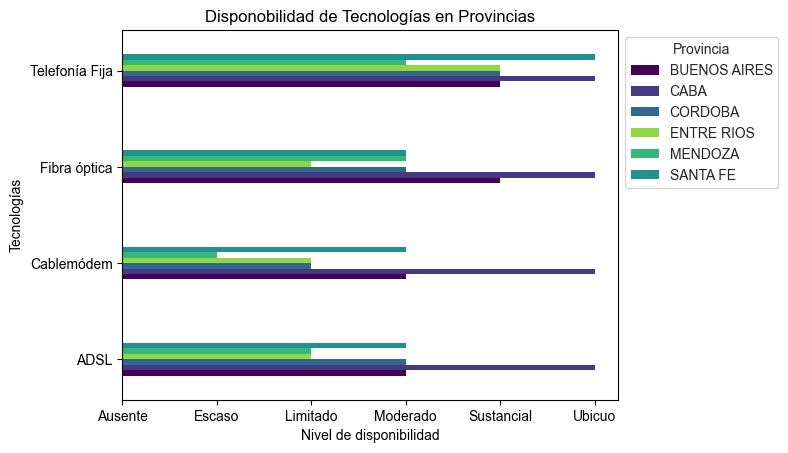

In [17]:
# Graficamos
graficar_conectividad_por_provincia(df_transformado, ['BUENOS AIRES','CABA', 'CORDOBA','SANTA FE', 'MENDOZA', 'ENTRE RIOS'], 
                                    ['Telefonía Fija', 'ADSL', 'Cablemódem', 'Fibra óptica'])

# 02 - Conexiones por Provincia

In [18]:
df2 = pd.read_csv('datasets/accesos_internetFijo_tecnologiaLocalidad.csv')
df2.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,"4,54",- 0,3,- 0,852,- 0,706,"6,98",NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,"1,28",NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN


### Eliminación, Limpieza y Reemplazo

In [19]:
# Empezamos por eliminar las columnas sin informacion
cols_drop = ['Unnamed: 13', 'Total general']
df2 = df2.drop(columns = cols_drop)

# y reemplazomos el - 0 por 0
reemplazo = {'- 0' : 0, '-0': 0}
cols = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 
        'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']
df2[cols] = df2[cols].replace(reemplazo)

In [20]:
# La coma representa miles.
# Procederemos a quitar la coma, remplazar por un punto y multiplicar por 1000.

# Definimos una función personalizada para la conversión
def convertir_valor(valor):
    if ',' in str(valor):
        # Si el valor contiene una coma, convierte el valor eliminando la coma y multiplicando por 10
        return float(valor.replace(',', '.')) * 1000
    else:
        # Si el valor no contiene coma, déjalo como está
        return float(valor)

# Aplica la función de conversión a la columna 'columna' usando map
df2[cols] = df2[cols].apply(lambda x: x.map(convertir_valor))

df2.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874.0,4540.0,0.0,3.0,0.0,852.0,0.0,706.0
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0.0,782.0,0.0,6.0,167.0,0.0,0.0,327.0
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


### Duplicados

In [21]:
# Verificamos duplicados en el DataFrame
df_duplicados = df2.duplicated().any()

# Imprimir el resultado
print("¿Hay duplicados en el DataFrame?:", df_duplicados)

# Si hay duplicados, mostrar las filas duplicadas y eliminarlos del DataFrame
if df_duplicados:
    duplicated_rows = df2[df2.duplicated()]
    print("Filas duplicadas:")
    print(duplicated_rows)
    
    # Eliminamos los duplicados del DataFrame
    df2 = df2.drop_duplicates()
    print("Duplicados eliminados. DataFrame actualizado.")
else:
    print("No hay duplicados en el DataFrame.")

¿Hay duplicados en el DataFrame?: False
No hay duplicados en el DataFrame.


In [22]:
# Verificamos duplicados con respecto a las columnas 'Provincia', 'Partido' y 'Localidad'

# Normalizamos las columnas
df2['Provincia'] = df2['Provincia'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()
df2['Partido'] = df2['Partido'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()
df2['Localidad'] = df2['Localidad'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()

# Verificamos duplicados basándose en las columnas normalizadas
duplicados = df2.duplicated(subset=['Provincia', 'Partido', 'Localidad'])

# Mostramos las filas duplicadas, si es que las hay.
filas_duplicadas = df2[duplicados]
filas_duplicadas

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
1243,CORDOBA,SAN JUSTO,TRANSITO,Sin Datos,0.0,943.0,0.0,133.0,0.0,0.0,0.0,0.0


In [23]:
df2[(df2['Provincia'] == 'CORDOBA') & (df2['Partido'] == 'SAN JUSTO') & (df2['Localidad'] == 'TRANSITO')]

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
1233,CORDOBA,SAN JUSTO,TRANSITO,14140400,71.0,0.0,0.0,0.0,0.0,0.0,0.0,106.0
1243,CORDOBA,SAN JUSTO,TRANSITO,Sin Datos,0.0,943.0,0.0,133.0,0.0,0.0,0.0,0.0


In [24]:
# Agrupa por las columnas 'Provincia', 'Partido' y 'Localidad', y suma los valores
df2 = df2.groupby(['Provincia', 'Partido', 'Localidad']).agg({
    'Link Indec': 'first',  # Tomamos el primer valor de 'Link Indec' 
    'ADSL': 'sum',
    'CABLEMODEM': 'sum',
    'DIAL UP': 'sum',
    'FIBRA OPTICA': 'sum',
    'OTROS': 'sum',
    'SATELITAL': 'sum',
    'WIMAX': 'sum',
    'WIRELESS': 'sum'
}).reset_index()

# Verificamos!!
df2[(df2['Provincia'] == 'CORDOBA') & 
                (df2['Partido'] == 'SAN JUSTO') & (df2['Localidad'] == 'TRANSITO')]

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
1239,CORDOBA,SAN JUSTO,TRANSITO,14140400,71.0,943.0,0.0,133.0,0.0,0.0,0.0,106.0


### Suma de Conexiones por Provincia

In [25]:
# Calcular la suma de conexiones por cada tipo de conexión por provincia
columnas_conexion = df2.columns[4:]
sum_conexion_provincia = df2.groupby('Provincia')[columnas_conexion].sum().reset_index()
sum_conexion_provincia.head()

,Provincia,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
0,BUENOS AIRES,322841.0,2766310.0,6199.0,1489172.0,62349.0,1227.0,1672.0,129885.0
1,CABA,138750.0,1240.0,2150.0,138550.0,29590.0,95.0,0.0,4600.0
2,CATAMARCA,8950.0,10994.0,1.0,47346.0,2151.0,90.0,0.0,1379.0
3,CHACO,24590.0,61270.0,5.0,47287.0,2490.0,79.0,0.0,7957.0
4,CHUBUT,45444.0,49952.0,904.0,9819.0,7789.0,150.0,0.0,30730.0


### Graficamos

In [26]:
# Transformamos el dataframe
df2_transformado = pd.melt(sum_conexion_provincia, id_vars=['Provincia'], var_name='Tecnologia', value_name='Cantidad')

In [27]:
def graficar_conexiones_por_provincia(df, provincias_seleccionadas, tecnologias_seleccionadas):
    """
    Grafica la cantidad de conexiones por provincia y tecnología.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - provincias_seleccionadas: Lista de provincias que se quieren graficar.
    - tecnologias_seleccionadas: Lista de tecnologías que se quieren graficar.

    No devuelve nada, simplemente muestra el gráfico.
    """
    # Filtrar las provincias y tecnologías específicas
    df_provincias = df[df['Provincia'].isin(provincias_seleccionadas)]
    df_seleccionado = df_provincias[df_provincias['Tecnologia'].isin(tecnologias_seleccionadas)]

    # Escalar las cantidades a miles
    df_seleccionado.loc[:, 'Cantidad'] = df_seleccionado['Cantidad'] / 1000

    # Automatizar la creación de colores para cada provincia
    colores_provincias = {provincia: plt.cm.viridis(i / len(provincias_seleccionadas)) for i, provincia in enumerate(provincias_seleccionadas)}

    # Ancho de las barras
    bar_width = 0.34

    # Gráfico de barras horizontal desde el DataFrame nuevo con colores personalizados
    ax = df_seleccionado.pivot(index='Tecnologia', columns='Provincia', values='Cantidad').plot(
        kind='barh', width=bar_width, color=[colores_provincias[col] for col in df_seleccionado['Provincia']]
    )

    sns.set_style("whitegrid")
    
    # Ajustar la posición de la leyenda
    ax.legend(title='Provincia', bbox_to_anchor=(1, 1))

    plt.yticks(np.arange(len(df_seleccionado['Tecnologia'].unique())), df_seleccionado['Tecnologia'].unique())

    plt.title('Cantidad de Conexiones por Provincia')
    plt.xlabel('Cantidad (en miles)')
    plt.ylabel('Tecnologías')
    plt.grid(False)
    plt.show()

### Conexiones por Tecnología en Provincias Seleccionadas

Este gráfico ofrece un resumen de la cantidad de conexiones por tecnología en las provincias seleccionadas. Según el filtro aplicado a las 06 provincias principales, se destaca que la tecnología predominante es el cablemódem.

Se invita a explorar el gráfico ajustando los parámetros según sea conveniente para obtener información detallada sobre otras provincias o variaciones tecnológicas.

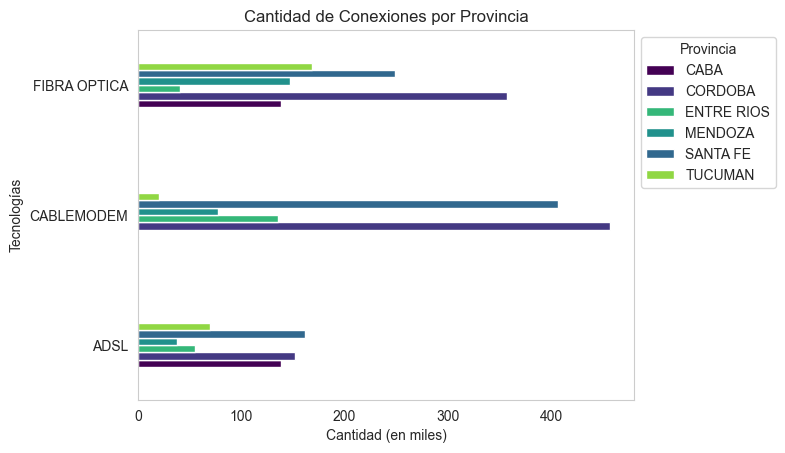

In [28]:
graficar_conexiones_por_provincia(df2_transformado, ['CABA', 'CORDOBA','SANTA FE', 'MENDOZA', 'ENTRE RIOS', 'TUCUMAN'], 
                                  ['ADSL', 'CABLEMODEM', 'FIBRA OPTICA'])

# 03 - Calidad de Velocidad por Provincia

In [29]:
# Traemos el CSV  con los tipo de datos str.
# Posterior, normalizaremos los numeros.
df3 = pd.read_csv('datasets/accesosa_internetFijo_velocidadBajada_localidad.csv', dtype=str)
df3.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,61 Mbps,62 Mbps,64 Mbps,65 Mbps,66 Mbps,70 Mbps,75 Mbps,78 Mbps,80 Mbps,83 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


### Reemplazo y Normalizacion de Numeros

In [30]:
# Se aprecio directamente en el datasets que los numeros estan separados por puntos.
# Ejemplo: 2.343 y 1.334 cuando deben ser 2343 y 1334

# Definimos una función para normalizar los números en una cadena de texto sin separadores de miles
def normalizar_numero(numero):
    numero_str = str(numero)
    
    if numero_str.endswith('.0'):
        numero_normalizado = numero_str
    
    else:
        # Si no hay parte decimal .0, eliminar todos los separadores de miles
        numero_normalizado = numero_str.replace('.', '').replace(',', '')
        
    # Convertimos el número normalizado a float
    numero_entero = float(numero_normalizado)
    
    return numero_entero

In [31]:
# Previo, reemplazamos los valores NaN por 0
df3.fillna(0, inplace=True)

# Aplicamos la función a cada columna del DataFrame (desde la columna 4 en adelante)
df3.iloc[:, 4:] = df3.iloc[:, 4:].apply(lambda x: x.map(normalizar_numero))

df3.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,61 Mbps,62 Mbps,64 Mbps,65 Mbps,66 Mbps,70 Mbps,75 Mbps,78 Mbps,80 Mbps,83 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Agrupación de Velocidades

Para analizar la velocidad de internet, es crucial agrupar las velocidades en categorías como:

- **Muy lento:** Hasta 512 kbps / 0.512 Mbps
- **Lento:** + 512 Kbps - 1 Mbps
- **Moderado:** + 1 Mbps - 6 Mbps
- **Razonable:** + 6 Mbps - 10 Mbps
- **Bueno:** + 10 Mbps - 20 Mbps
- **Rápido:** + 20 Mbps - 30 Mbps
- **Muy rápido:** + 30 Mbps

Demasiadas columnas dificultan el análisis, por lo que se prefieren rangos consolidados.

In [32]:
g1 = ['0,256 Mbps', '0,375 Mbps', '0,5 Mbps', '0,512 Mbps']
g2 = ['0,625 Mbps','0,75 Mbps', '1 Mbps']
g3 = ['1,25 Mbps', '1,5 Mbps', '2 Mbps', '2,2 Mbps','2,5 Mbps', '3 Mbps', '3,3 Mbps', '3,5 Mbps', '4 Mbps', '4,5 Mbps','5 Mbps', '6 Mbps']
g4 = ['6,4 Mbps', '7 Mbps', '7,5 Mbps', '8 Mbps','9 Mbps', '10 Mbps']
g5= ['10,2 Mbps', '11 Mbps', '12 Mbps', '12,3 Mbps','13 Mbps', '14 Mbps','15 Mbps', '16 Mbps', '17 Mbps', '18 Mbps','20 Mbps']
g6 = ['20,5 Mbps', '21 Mbps', '22 Mbps', '23 Mbps', '24 Mbps','25 Mbps', '25,1 Mbps', '25,5 Mbps', '26 Mbps', '27 Mbps', '30 Mbps']
g7 = ['31 Mbps', '32 Mbps', '34 Mbps', '35 Mbps', '36 Mbps', '38 Mbps','39 Mbps', '40 Mbps', '41 Mbps', '45 Mbps', '46 Mbps', '48 Mbps','49 Mbps', '50 Mbps', '50,1 Mbps', '50,25 Mbps', '51 Mbps', '55 Mbps', '58 Mbps', '59 Mbps', '60 Mbps', '61 Mbps', '62 Mbps', '64 Mbps', '65 Mbps', '66 Mbps', '70 Mbps', '75 Mbps', '78 Mbps', '80 Mbps', '83 Mbps']

# Lista de grupos
grupos = [g1, g2, g3, g4, g5, g6, g7]

# Sumamos los valores en cada grupo de columnas y almacena los resultados en un nuevo DataFrame
df_grupos = pd.DataFrame()
for i, grupo in enumerate(grupos, start=1):
    df_grupos[f'g{i}'] = df3[grupo].sum(axis=1)

# Actualizamos los nombres
actulizar_nombres = {
   'g1': 'muy_lenta',
   'g2': 'lenta',
   'g3': 'moderada',
   'g4': 'razonable',
   'g5': 'buena',
   'g6': 'rapida',
   'g7': 'muy_rapida'
}
df_grupos.rename(columns = actulizar_nombres, inplace=True)

df_grupos.head()

,muy_lenta,lenta,moderada,razonable,buena,rapida,muy_rapida
0,2.0,19.0,424.0,476.0,4975.0,262.0,50.0
1,0.0,0.0,46.0,13.0,0.0,0.0,0.0
2,1.0,0.0,181.0,10.0,0.0,0.0,0.0
3,0.0,0.0,66.0,0.0,0.0,0.0,0.0
4,0.0,0.0,175.0,5.0,0.0,0.0,1.0


In [33]:
# Extraemos del dataframe original, las columnas que con responda a ubicacion, incluyendo la columna 'Otros'.
cols = ['Provincia', 'Partido', 'Localidad', 'Link Indec', 'Otros']
df_ubicacion = df3[cols]

# Concatenar los DataFrames a lo largo del eje de las columnas
df3 = pd.concat([df_ubicacion,df_grupos ], axis=1)
df3.head()


,Provincia,Partido,Localidad,Link Indec,Otros,muy_lenta,lenta,moderada,razonable,buena,rapida,muy_rapida
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.0,2.0,19.0,424.0,476.0,4975.0,262.0,50.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0.0,0.0,0.0,46.0,13.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0.0,1.0,0.0,181.0,10.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0.0,0.0,0.0,66.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,0.0,0.0,175.0,5.0,0.0,0.0,1.0


### Duplicados

In [34]:
# Verificamos duplicados en el DataFrame
df_duplicados = df3.duplicated().any()

# Imprimir el resultado
print("¿Hay duplicados en el DataFrame?:", df_duplicados)

# Si hay duplicados, mostrar las filas duplicadas y eliminarlos del DataFrame
if df_duplicados:
    duplicated_rows = df3[df3.duplicated()]
    print("Filas duplicadas:")
    print(duplicated_rows)
    
    # Eliminamos los duplicados del DataFrame
    df3 = df3.drop_duplicates()
    print("Duplicados eliminados. DataFrame actualizado.")
else:
    print("No hay duplicados en el DataFrame.")

¿Hay duplicados en el DataFrame?: False
No hay duplicados en el DataFrame.


In [35]:
# Verificamos duplicados con respecto a las columnas 'Provincia', 'Partido' y 'Localidad'

# Normalizamos las columnas
df3['Provincia'] = df3['Provincia'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()
df3['Partido'] = df3['Partido'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()
df3['Localidad'] = df3['Localidad'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()

# Verificamos duplicados basándose en las columnas normalizadas
duplicados = df3.duplicated(subset=['Provincia', 'Partido', 'Localidad'])

# Mostramos las filas duplicadas, si es que las hay.
filas_duplicadas = df3[duplicados]
filas_duplicadas

,Provincia,Partido,Localidad,Link Indec,Otros,muy_lenta,lenta,moderada,razonable,buena,rapida,muy_rapida
1235,CORDOBA,SAN JUSTO,TRANSITO,14140400,0.0,0.0,0.0,67.0,1014.0,95.0,0.0,68.0


In [36]:
df3[(df3['Provincia'] == 'CORDOBA') & (df3['Partido'] == 'SAN JUSTO') & (df3['Localidad'] == 'TRANSITO')]

,Provincia,Partido,Localidad,Link Indec,Otros,muy_lenta,lenta,moderada,razonable,buena,rapida,muy_rapida
1234,CORDOBA,SAN JUSTO,TRANSITO,Sin Datos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0
1235,CORDOBA,SAN JUSTO,TRANSITO,14140400,0.0,0.0,0.0,67.0,1014.0,95.0,0.0,68.0


In [37]:
# Agrupa por las columnas 'Provincia', 'Partido' y 'Localidad', y suma los valores
df3_consolidado = df3.groupby(['Provincia', 'Partido', 'Localidad']).agg({
    'Link Indec': lambda x: x.iloc[1] if len(x) > 1 else x.iloc[0],  # Obtenemos el segundo valor de 'Link Indec' si existe, de lo contrario, toma el primer valor
    'Otros': 'sum',
    'muy_lenta': 'sum',
    'lenta': 'sum',
    'moderada': 'sum',
    'razonable' : 'sum',
    'buena': 'sum',
    'rapida': 'sum',
    'muy_rapida': 'sum'
       
}).reset_index()

# Verificamos!!
df3_consolidado[(df3_consolidado['Provincia'] == 'CORDOBA') & 
                (df3_consolidado['Partido'] == 'SAN JUSTO') & (df3_consolidado['Localidad'] == 'TRANSITO')]

,Provincia,Partido,Localidad,Link Indec,Otros,muy_lenta,lenta,moderada,razonable,buena,rapida,muy_rapida
1234,CORDOBA,SAN JUSTO,TRANSITO,14140400,0.0,0.0,0.0,67.0,1014.0,95.0,0.0,110.0


In [38]:
# Eliminamos la columnas Otros, no aportaría valor al análisis
df3.drop(columns='Otros', inplace=True)

# Convertimos las columnas a tipo 'int'
df3.iloc[:, 4:] = df3.iloc[:, 4:].astype(int)

df3.head()

,Provincia,Partido,Localidad,Link Indec,muy_lenta,lenta,moderada,razonable,buena,rapida,muy_rapida
0,BUENOS AIRES,25 DE MAYO,25 DE MAYO,6854100,2,19,424,476,4975,262,50
1,BUENOS AIRES,25 DE MAYO,AGUSTIN MOSCONI,6854010,0,0,46,13,0,0,0
2,BUENOS AIRES,25 DE MAYO,DEL VALLE,6854020,1,0,181,10,0,0,0
3,BUENOS AIRES,25 DE MAYO,ERNESTINA,6854030,0,0,66,0,0,0,0
4,BUENOS AIRES,25 DE MAYO,GOBERNADOR UGARTE,6854040,0,0,175,5,0,0,1


### Agrupación por Provincia

In [39]:
# Calcular la suma de calidad de conexiones por provincia
cols = df3.columns[4:]
calidad_conexion_provincia = df3.groupby('Provincia')[cols].sum().reset_index()

calidad_conexion_provincia.head()

,Provincia,muy_lenta,lenta,moderada,razonable,buena,rapida,muy_rapida
0,BUENOS AIRES,28934,23347,259866,281550,244555,817733,1011782
1,CABA,516,5096,31320,64653,36336,61172,210480
2,CATAMARCA,71,315,2716,5028,4638,3122,30388
3,CHACO,461,771,16067,17846,6704,3050,27557
4,CHUBUT,109,1614,46457,31007,34728,16759,17508


### Graficamos

In [40]:
# Transformamos el dataframe
df3_transformado = pd.melt(calidad_conexion_provincia, id_vars=['Provincia'], var_name='Calidad', value_name='Cantidad')

In [41]:
def graficar_calidad_por_provincia(df, provincias_seleccionadas, calidad_seleccionadas):
    """
    Grafica la calidad de conexiones por provincia.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - provincias_seleccionadas: Lista de provincias que se quieren graficar.
    - calidad_seleccionadas: Lista de calidades que se quieren graficar.

    No devuelve nada, simplemente muestra el gráfico.
    """
    # Filtrar las provincias
    df_provincias = df[df['Provincia'].isin(provincias_seleccionadas)]

    # Filtrar por calidad
    df_seleccionado = df_provincias[df_provincias['Calidad'].isin(calidad_seleccionadas)]

    # Escalar las cantidades a miles
    df_seleccionado.loc[:, 'Cantidad'] = df_seleccionado['Cantidad'] / 1000

    # Automatizamos la creación de colores para cada provincia
    colores_provincias = {provincia: plt.cm.viridis(i / len(provincias_seleccionadas)) for i, provincia in enumerate(provincias_seleccionadas)}

    # Ancho de las barras
    bar_width = 0.6

    # Gráfico de barras vertical desde el DataFrame nuevo con colores personalizados
    ax = df_seleccionado.pivot(index='Calidad', columns='Provincia', values='Cantidad').plot(
        kind='bar', width=bar_width, color=[colores_provincias[col] for col in df_seleccionado['Provincia']]
    )

    
    # Ajustamos la posición de la leyenda
    ax.legend(title='Provincia', bbox_to_anchor=(1.3, 1))

    # Rotar los nombres en el eje x
    ax.set_xticklabels(df_seleccionado['Calidad'].unique(), rotation=0)

    # Configurar las ubicaciones y etiquetas de las marcas en el eje x
    plt.xticks(np.arange(len(df_seleccionado['Calidad'].unique())), df_seleccionado['Calidad'].unique())

    plt.title('Calidad de Conexiones por Provincia')
    plt.ylabel('Cantidad (en miles)')
    plt.xlabel('Calidad')
    plt.grid(False)
    plt.show()


### Análisis de Velocidades de Conexión en Argentina

Este gráfico destaca que la calidad de velocidad **rápida** es la predominante en comparación con otras categorías. Sin embargo, se enfatiza que la tendencia general apunta hacia la preferencia por velocidades **muy rápidas**, dado el constante deseo de adoptar tecnologías más avanzadas y rápidas.

En este contexto, se sugiere promocionar la tecnología de Fibra Óptica, tanto en provincias con calidades de conexión rápidas como en aquellas con menor calidad. Esto permitirá satisfacer la demanda actual y futura de conexiones más veloces.

Se invita a visualizar el gráfico para obtener una representación visual de estas tendencias y consideraciones.

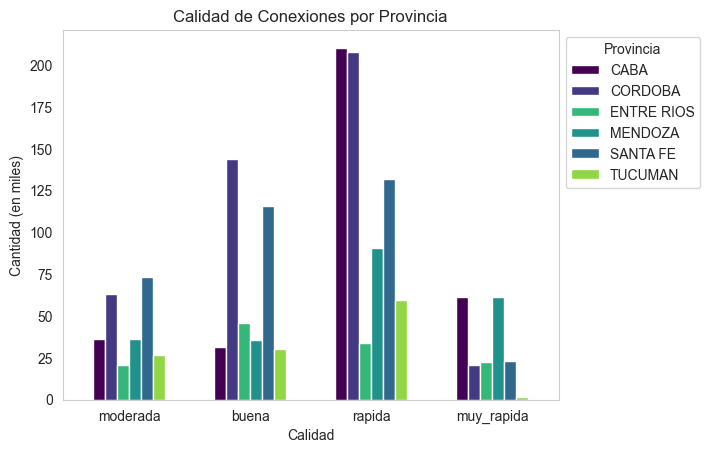

In [42]:
# Graficamos
graficar_calidad_por_provincia(df3_transformado, ['CABA', 'CORDOBA','SANTA FE', 'MENDOZA', 'ENTRE RIOS', 'TUCUMAN'], 
                               ['moderada','buena', 'rapida', 'muy_rapida'])

# 04 - Historico Calidad de Conexion por Provincia

In [43]:
# Cargamos las columnas como tipo str para evitar pérdida de datos durante la conversión automática a float.
tipos_datos = {
    'HASTA 512 kbps':str,
    '+ 512 Kbps - 1 Mbps':str,
    '+ 1 Mbps - 6 Mbps': str,
    '+ 6 Mbps - 10 Mbps': str,
    '+ 10 Mbps - 20 Mbps': str,
    '+ 20 Mbps - 30 Mbps': str,
    '+ 30 Mbps': str,
    'OTROS': str,
    'Total': str
}

df4 = pd.read_csv('datasets/accesos_internet_fijo_velocidadBajada_porRangos_provincia.csv', dtype=tipos_datos)
df4.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28.934,23.347,259.866,281.550,244.555,98.670,3.760.109,97.634,4.794.665
1,2022,4,Capital Federal,516,5.096,31.320,64.653,36.336,8.116,1.299.117,106.772,1.551.926
2,2022,4,Catamarca,71,315,2.716,5.028,4.638,3.122,52.739,2.280,70.909
3,2022,4,Chaco,461,771,16.067,17.846,6.704,3.039,94.866,3.909,143.663
4,2022,4,Chubut,109,1.614,46.457,31.007,34.728,15.770,19.048,20.026,168.759


### Renombramos Columnas, Normalizamos Numeros y Provincias

In [44]:
# Cambiamos el nombre de las columnas de rangos!
actulizar_nombres = {
    'HASTA 512 kbps':'muy_lenta',
    '+ 512 Kbps - 1 Mbps':'lenta',
    '+ 1 Mbps - 6 Mbps': 'moderada',
    '+ 6 Mbps - 10 Mbps': 'razonable',
    '+ 10 Mbps - 20 Mbps': 'buena',
    '+ 20 Mbps - 30 Mbps': 'rapida',
    '+ 30 Mbps': 'muy_rapida'
}
df4.rename(columns=actulizar_nombres, inplace=True)

# Elimanmos la columna 'OTROS' y 'Total'
df4.drop(columns=['OTROS', 'Total'], inplace=True)

# Normalizamos los numeros con la funcion antes creada
cols = ['muy_lenta', 'lenta', 'moderada', 'razonable', 'buena', 'rapida', 'muy_rapida']
df4[cols]=df4[cols].apply(lambda x: x.map(normalizar_numero))

# Convertimos los numeros a tipo int
df4['muy_lenta'] = df4['muy_lenta'].astype(int)
df4['lenta'] = df4['lenta'].astype(int)
df4['moderada'] = df4['moderada'].astype(int)
df4['razonable'] = df4['razonable'].astype(int)
df4['buena'] = df4['buena'].astype(int)
df4['rapida'] = df4['rapida'].astype(int)
df4['muy_rapida'] = df4['muy_rapida'].astype(int)

# Normalizamos, again, las columnas 'Provincia', 'Partido' y 'Localidad'
df4['Provincia'] = df4['Provincia'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()

df4.head()

,Año,Trimestre,Provincia,muy_lenta,lenta,moderada,razonable,buena,rapida,muy_rapida
0,2022,4,BUENOS AIRES,28934,23347,259866,281550,244555,98670,3760109
1,2022,4,CAPITAL FEDERAL,516,5096,31320,64653,36336,8116,1299117
2,2022,4,CATAMARCA,71,315,2716,5028,4638,3122,52739
3,2022,4,CHACO,461,771,16067,17846,6704,3039,94866
4,2022,4,CHUBUT,109,1614,46457,31007,34728,15770,19048


### Graficamos

In [45]:
df4_transformado = pd.melt(df4, id_vars=['Año','Trimestre','Provincia'], var_name='Calidad', value_name='Cantidad')
df4_transformado['Cantidad'] = df4_transformado['Cantidad'] / 1000

In [46]:
def plot_calidad_provincias(df, provincias, calidades=None):
    df = df[df['Año'] >= 2018]
    # Filtrar por provincias seleccionadas y crear una copia del DataFrame resultante
    df_provincias = df[df['Provincia'].isin(provincias)]

    orden_calidades = ['muy_rapida', 'rapida', 'buena', 'razonable', 'moderada', 'lenta', 'muy_lenta']

    # Si no se proporciona la lista de calidades, mostrar todas
    calidades = calidades or orden_calidades

    # Obtener colores únicos para cada combinación de provincia y calidad
    colores = sns.color_palette("viridis", n_colors=len(provincias) * len(calidades)).as_hex()
    colores = dict(zip([(calidad, provincia) for calidad in calidades for provincia in provincias], colores))

    plt.figure(figsize=(10, 6))
    
    for calidad in calidades:
        for provincia in provincias:
            datos = df_provincias[(df_provincias['Provincia'] == provincia) & (df_provincias['Calidad'] == calidad)]
            plt.plot(
                datos['Año'].astype(str) + '-' + datos['Trimestre'].astype(str),
                datos['Cantidad'],
                label=f'{provincia} - {calidad}',
                #marker='o',
                linewidth=3,
                color=colores.get((calidad, provincia), 'gray')  # Utilizar gris si no hay una asignación específica
            )

    sns.set_style("whitegrid")
    plt.gca().invert_xaxis()
    plt.xticks(rotation=45, ha='right')

    plt.legend(title='Provincia - Calidad', bbox_to_anchor=(1, 1))

    plt.title(f'Histórico de la Relación Provincia - Calidad')
    plt.xlabel('Año-Trimestre')
    plt.ylabel('Cantidad (miles)')
    plt.grid(False)
    plt.show()

### Análisis Histórico de Relación Provincia-Calidad de Velocidad

Este gráfico histórico revela que a partir del año 2018 se observa un notable incremento en la calidad de velocidad, especialmente en la categoría de **muy rápida** (superior a +30 Mbps). Este cambio indica una tendencia clara de migración hacia velocidades más altas por parte de las provincias.

La interpretación de estos datos sugiere que las provincias están optando por tecnologías que ofrecen velocidades superiores, y la fibra óptica emerge como una opción destacada en este escenario.

Se invita a visualizar el gráfico para obtener una representación visual detallada de estas tendencias históricas, reforzando la idea de que el éxito del negocio podría estar estrechamente vinculado a la adopción de la fibra óptica.


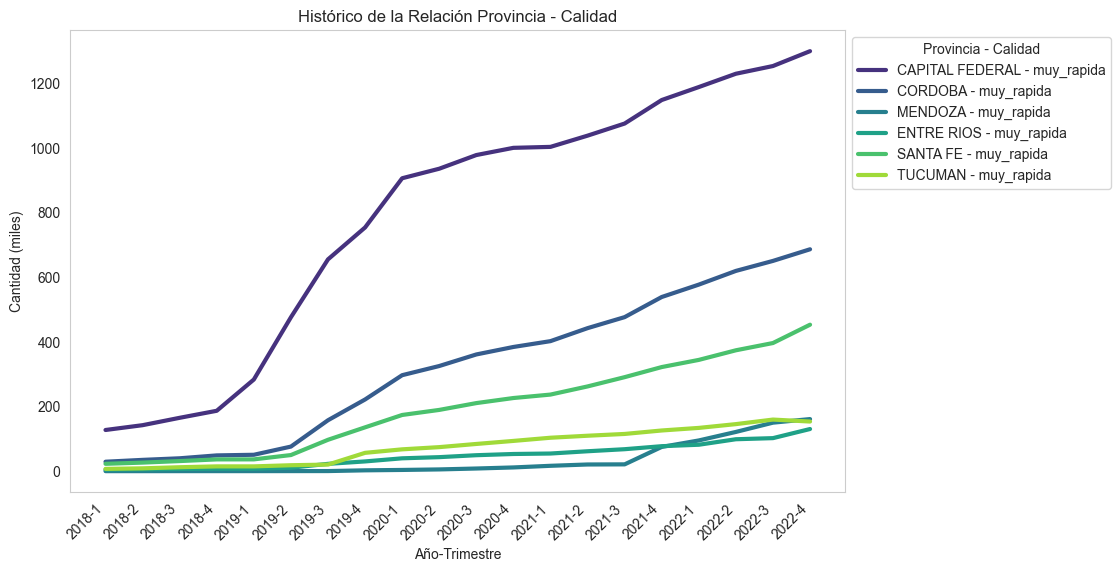

In [47]:
# Llamamos a la función con los datos, las provincias específicas y las calidades a mostrar en la leyenda
plot_calidad_provincias(df4_transformado, ['CAPITAL FEDERAL', 'CORDOBA', 'MENDOZA', 'ENTRE RIOS', 'SANTA FE', 'TUCUMAN'], 
                        calidades=['muy_rapida'])

# 05 - Historico Velocidad Media por Provincia

In [48]:
df5 = pd.read_excel('datasets/historico_velocidad_media_internet_provincia.xlsx')
df5.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.00
1,2022,4,Capital Federal,182.86
2,2022,4,Catamarca,83.33
3,2022,4,Chaco,104.02
4,2022,4,Chubut,15.92


In [49]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


In [50]:
df5.describe().round(2)

,Año,Trimestre,Mbps (Media de bajada)
count,864.00,864.00,864.00
mean,2018.00,2.50,15.38
std,2.58,1.12,18.32
min,2014.00,1.00,2.57
25%,2016.00,1.75,4.32
50%,2018.00,2.50,7.42
75%,2020.00,3.25,19.71
max,2022.00,4.00,182.86


In [51]:
# Normalizamos la columna Provincia
df5['Provincia'] = df5['Provincia'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()

# Redondeamos la columna de Mbps
df5['Mbps (Media de bajada)'] = df5['Mbps (Media de bajada)'].round(2)

df5.head()


,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,BUENOS AIRES,111.00
1,2022,4,CAPITAL FEDERAL,182.86
2,2022,4,CATAMARCA,83.33
3,2022,4,CHACO,104.02
4,2022,4,CHUBUT,15.92


### Graficamos

In [52]:
def plot_velocidad_provincias(df, provincias):
    df_provincias = df[(df['Provincia'].isin(provincias)) & (df['Año'] >= 2017)]

    plt.figure(figsize=(10, 6))

    # Utilizar la paleta de colores "viridis"
    colores = sns.color_palette("viridis", n_colors=len(provincias))

    for i, provincia in enumerate(provincias):
        datos_provincia = df_provincias[df_provincias['Provincia'] == provincia]
        plt.plot(
            datos_provincia['Año'].astype(str) + '-' + datos_provincia['Trimestre'].astype(str),
            datos_provincia['Mbps (Media de bajada)'],
            #marker='o',
            linewidth = 3,
            label=provincia,
            color=colores[i]
        )

    sns.set_style("whitegrid")
    plt.gca().invert_xaxis()
    plt.xticks(rotation=45, ha='right')

    plt.title('Velocidad Media en Provincias')
    plt.xlabel('Año-Trimestre')
    plt.ylabel('Velocidad Media Mbps')
    plt.legend(title='Provincia', bbox_to_anchor=(1, 1))
    plt.grid(False)

    plt.show()

### Análisis Histórico de Velocidad Media en Provincias

Esta gráfica histórica de velocidad media en provincias confirma de manera evidente que la migración predominante ha sido hacia la tecnología de **fibra óptica** en las principales provincias. Estos datos subrayan la importancia estratégica para la empresa de enfocarse y planificar su crecimiento en este ámbito específico.

Se invita a visualizar el gráfico para obtener una representación visual detallada de estas tendencias, lo que proporcionará una perspectiva más completa y respaldará la toma de decisiones estratégicas.

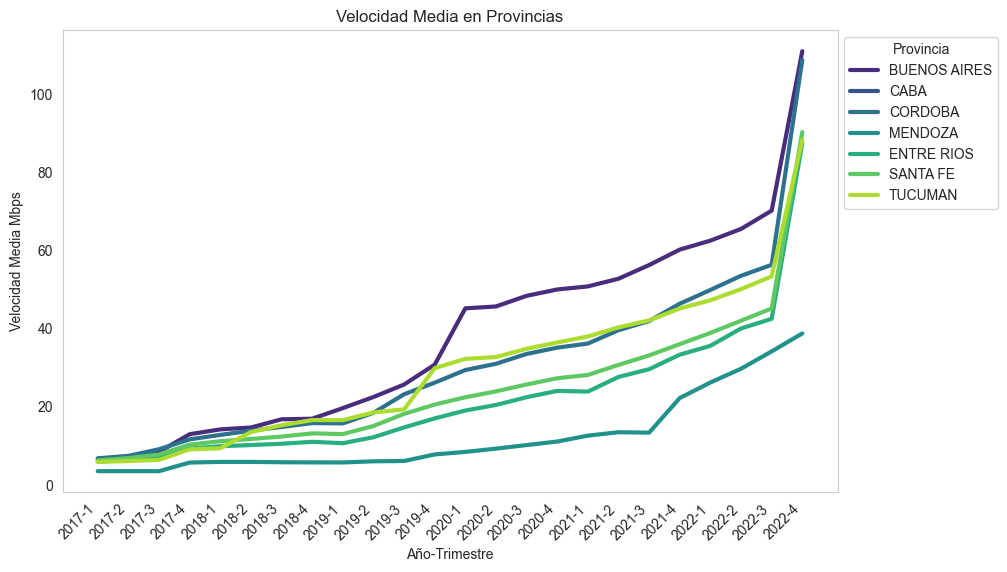

In [53]:
# Llamamos a la función con los datos y la provincia específica
plot_velocidad_provincias(df5,['BUENOS AIRES','CABA', 'CORDOBA', 'MENDOZA', 'ENTRE RIOS', 'SANTA FE', 'TUCUMAN'])

# 06 - Historico Conectividad en Provincias

In [54]:
df6 = pd.read_excel('datasets/accesos_internetFijo_tecnologiaProvincia.xlsx')
df6.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0,4794665.0
1,2022,4,Capital Federal,138753.0,1238196.0,138548.0,4603.0,31826.0,1551926.0
2,2022,4,Catamarca,8952.0,10998.0,47337.0,1379.0,2243.0,70909.0
3,2022,4,Chaco,24582.0,61265.0,47285.0,7957.0,2574.0,143663.0
4,2022,4,Chubut,45450.0,73923.0,9815.0,30721.0,8850.0,168759.0


In [55]:
# Quitamos la columna Total
df6.drop(columns='Total', inplace=True)

# Nomalizamos los nombres de las provincias
df6['Provincia'] = df6['Provincia'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()

df6.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
0,2022,4,BUENOS AIRES,325908.0,2767247.0,1499149.0,129910.0,72451.0
1,2022,4,CAPITAL FEDERAL,138753.0,1238196.0,138548.0,4603.0,31826.0
2,2022,4,CATAMARCA,8952.0,10998.0,47337.0,1379.0,2243.0
3,2022,4,CHACO,24582.0,61265.0,47285.0,7957.0,2574.0
4,2022,4,CHUBUT,45450.0,73923.0,9815.0,30721.0,8850.0


In [56]:
df6.tail()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
861,2014,1,SANTIAGO DEL ESTERO,32567.0,3598.0,19.0,915.0,34.0
862,2014,1,TIERRA DEL FUEGO,21618.0,2837.0,648.0,1.0,2934.0
863,2014,1,TUCUMAN,129717.0,83.0,121.0,13.0,98.0
864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
865,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Observamos algo extraño aqui!
# Almacenemos el filtro en una variable y leamos que nos dice la descripcion
fila_rara = df6[df6.isnull().any(axis=1)]
fila_rara.loc[865,'Trimestre']

'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.'

In [58]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           865 non-null    object 
 1   Trimestre     865 non-null    object 
 2   Provincia     864 non-null    object 
 3   ADSL          864 non-null    float64
 4   Cablemodem    864 non-null    float64
 5   Fibra óptica  864 non-null    float64
 6   Wireless      864 non-null    float64
 7   Otros         864 non-null    float64
dtypes: float64(5), object(3)
memory usage: 54.3+ KB


In [59]:
# Despues de haber encontrado el dato nulo, ahora pasamos a dropear valores nulos.
df6.dropna(axis=0,  inplace=True)

# Eliminamos el asterisco al final de cada número en las columnas
df6['Año'] = df6['Año'].astype(str).str.rstrip('*')
df6['Trimestre'] = df6['Trimestre'].astype(str).str.rstrip('*')

# Convertimos las columnas especificas de tipo float a int
cols = ['Año','Trimestre', 'ADSL',	'Cablemodem', 'Fibra óptica', 'Wireless','Otros']
df6[cols] = df6[cols].astype(int)

df6.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
0,2022,4,BUENOS AIRES,325908,2767247,1499149,129910,72451
1,2022,4,CAPITAL FEDERAL,138753,1238196,138548,4603,31826
2,2022,4,CATAMARCA,8952,10998,47337,1379,2243
3,2022,4,CHACO,24582,61265,47285,7957,2574
4,2022,4,CHUBUT,45450,73923,9815,30721,8850


### Graficamos

In [60]:

df6_transformado = pd.melt(df6, id_vars=['Año','Trimestre','Provincia'], var_name='Tecnologia', value_name='Cantidad')
df6_transformado.head()

,Año,Trimestre,Provincia,Tecnologia,Cantidad
0,2022,4,BUENOS AIRES,ADSL,325908
1,2022,4,CAPITAL FEDERAL,ADSL,138753
2,2022,4,CATAMARCA,ADSL,8952
3,2022,4,CHACO,ADSL,24582
4,2022,4,CHUBUT,ADSL,45450


In [61]:
df6_transformado['Cantidad'] = df6_transformado['Cantidad'] /1000

In [62]:
def plot_cantidad_tecnologias_provincias(df, provincias, tecnologias):
    df = df[df['Año'] >= 2018]
    df_filtrado = df[(df['Provincia'].isin(provincias)) & (df['Tecnologia'].isin(tecnologias))]

    plt.figure(figsize=(10, 6))

    # Utilizar la paleta de colores "viridis"
    colores = sns.color_palette("viridis", n_colors=len(provincias) * len(tecnologias))

    for i, provincia in enumerate(provincias):
        for j, tecnologia in enumerate(tecnologias):
            datos_filtrados = df_filtrado[(df_filtrado['Provincia'] == provincia) & (df_filtrado['Tecnologia'] == tecnologia)]
            label = f'{provincia} - {tecnologia}'
            plt.plot(
                datos_filtrados['Año'].astype(str) + '-Q' + datos_filtrados['Trimestre'].astype(str),
                datos_filtrados['Cantidad'],
                #marker='o',
                linewidth =3,
                label=label,
                color=colores[i * len(tecnologias) + j]
            )

    sns.set_style("whitegrid")
    plt.gca().invert_xaxis()
    plt.xticks(rotation=45, ha='right')

    plt.title(f'Tecnologías en Provincias')
    plt.xlabel('Año-Trimestre')
    plt.ylabel('Cantidad de Conexiones (miles)')
    plt.legend(title='Provincia - Tecnologia', bbox_to_anchor=(1, 1))
    plt.grid(False)

    plt.show()



### Análisis Histórico de Conexiones en Provincias

Esta gráfica confirma de manera evidente que la migración predominante ha sido hacia la tecnología de **fibra óptica** en las principales provincias. Estos datos subrayan la importancia estratégica para la empresa de enfocarse y planificar su crecimiento en este ámbito específico.

Se invita a visualizar el gráfico para obtener una representación visual detallada de estas tendencias, lo que proporcionará una perspectiva más completa y respaldará la toma de decisiones estratégicas.

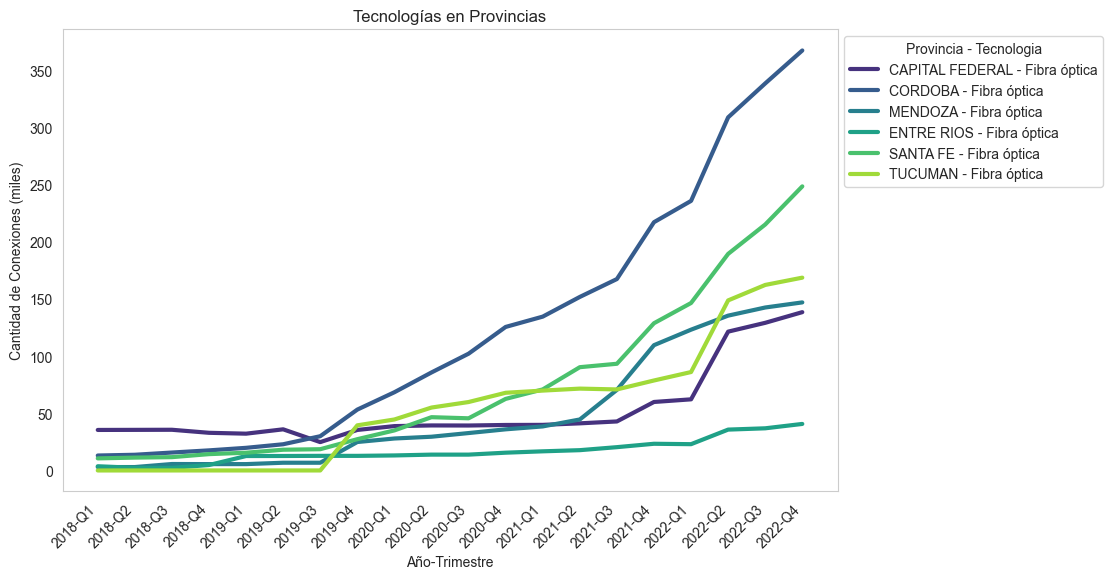

In [63]:

# Llamamos a la función con los datos y las listas de provincias y tecnologías
plot_cantidad_tecnologias_provincias(df6_transformado, ['CAPITAL FEDERAL', 'CORDOBA', 'MENDOZA', 
                                                        'ENTRE RIOS', 'SANTA FE', 'TUCUMAN'], 
                                     ['Fibra óptica'])

# 07 - Historico Banda Ancha y Angosta por Provincia

In [64]:
df7 = pd.read_excel('datasets/Internet_BAF.xlsx')
df7.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199.0,4794665
1,2022,4,Capital Federal,1549781,2145.0,1551926
2,2022,4,Catamarca,70908,1.0,70909
3,2022,4,Chaco,143658,5.0,143663
4,2022,4,Chubut,167855,904.0,168759


In [65]:
# No usaremos Dial Up, por que representa un porcentaje minimo
# Ademas es una tecnologia antigua
df7.drop(columns=['Dial up', 'Total'], inplace=True)

# Normalizamos los nombres de Provincia
df7['Provincia'] = df7['Provincia'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()

df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               864 non-null    int64 
 1   Trimestre         864 non-null    int64 
 2   Provincia         864 non-null    object
 3   Banda ancha fija  864 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 27.1+ KB


### Graficamos

In [66]:
df7_group = df7.groupby(['Año', 'Provincia'])['Banda ancha fija'].sum().reset_index()
df7_group['Banda ancha fija'] = df7_group['Banda ancha fija']/1000
df7_group.head()

,Año,Provincia,Banda ancha fija
0,2014,BUENOS AIRES,11112.877
1,2014,CAPITAL FEDERAL,5214.427
2,2014,CATAMARCA,99.006
3,2014,CHACO,255.471
4,2014,CHUBUT,270.395


In [67]:
def graficar_banda_ancha_por_provincia(df, provincias_seleccionadas):

    # Filtrar por varias provincias
    df_filtrado = df[df['Provincia'].isin(provincias_seleccionadas)]

    # Definir la paleta de colores Viridis
    colores = sns.color_palette("viridis", n_colors=len(provincias_seleccionadas))

    # Graficar los datos en un gráfico de barras
    plt.figure(figsize=(10, 6))
    for i, provincia in enumerate(provincias_seleccionadas):
        df_provincia = df_filtrado[df_filtrado['Provincia'] == provincia]
        plt.bar(df_provincia['Año'], df_provincia['Banda ancha fija'], label=provincia, color=colores[i], width=0.5)

    sns.set_style("whitegrid")
    plt.title('Banda ancha fija en varias Provincias')
    plt.xlabel('Año')
    plt.ylabel('Banda ancha fija (miles)')
    plt.grid(False)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()


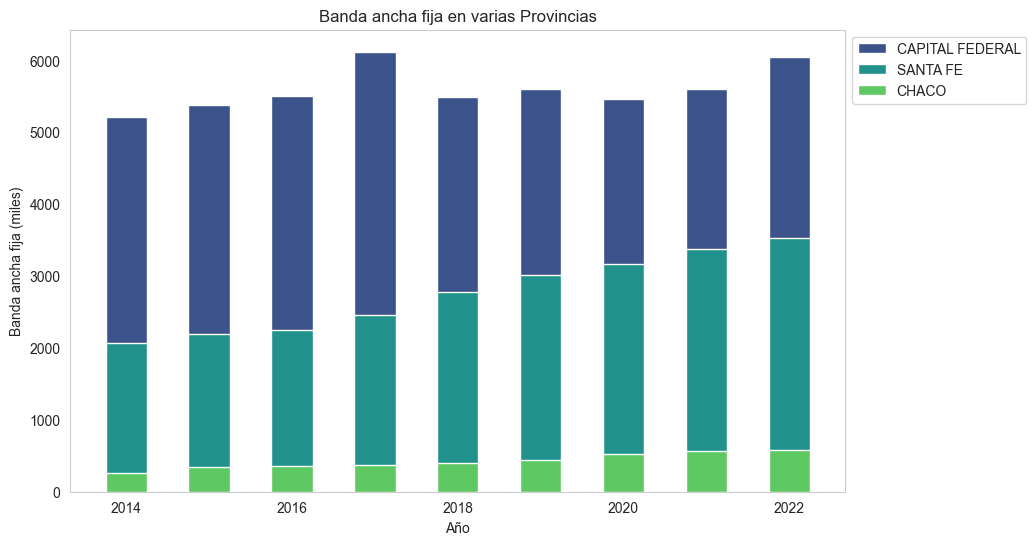

In [68]:
graficar_banda_ancha_por_provincia(df7_group, ['CAPITAL FEDERAL', 'SANTA FE', 'CHACO'])

# 08 - Ingresos Trimestrales

In [69]:
df8 = pd.read_csv('datasets/ingresos_trimestrales.csv')
df8.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,72,Oct-Dic 2022
1,2022,3,64,Jul-Sept 2022
2,2022,2,60,Abr-Jun 2022
3,2022,1,55,Ene-Mar 2022
4,2021,4,45,Oct-Dic 2021


In [70]:
# Retiramos la columna Perido
df8.drop(columns=['Periodo'], inplace=True)

df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Año                        36 non-null     int64
 1   Trimestre                  36 non-null     int64
 2   Ingresos (miles de pesos)  36 non-null     int64
dtypes: int64(3)
memory usage: 996.0 bytes


### Graficamos
### Análisis de Ingresos Trimestrales

La gráfica de ingresos trimestrales revela una tendencia ascendente significativa a partir del año 2018, indicando un crecimiento más pronunciado en comparación con los años anteriores. Este patrón positivo subraya la ventaja actual para los inversores que consideran la inversión en internet a través de fibra óptica.

La correlación entre el aumento de ingresos y la inversión en fibra óptica sugiere una oportunidad estratégica para capitalizar este crecimiento y garantizar una posición ventajosa en el mercado.


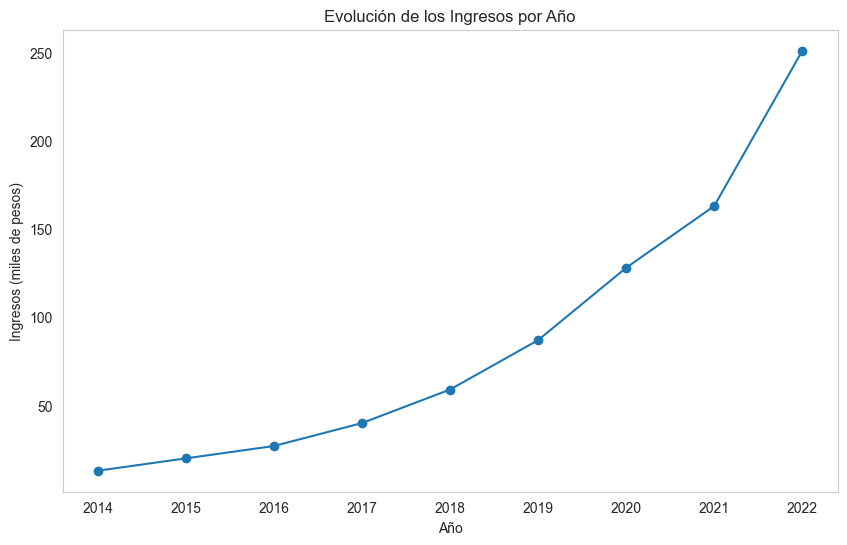

In [71]:
# Agrupar por año y sumar los ingresos por año
df_agrupado = df8.groupby('Año')['Ingresos (miles de pesos)'].sum().reset_index()

# Graficar los datos en un gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(df_agrupado['Año'], df_agrupado['Ingresos (miles de pesos)'], marker='o')

plt.title('Evolución de los Ingresos por Año')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.grid(False)
plt.show()

# 09 - Internet por cada 100 Hogares

In [72]:
cols = ['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares']
df9 = pd.read_csv('datasets/datasetsGraph/Internet_Penetracion_100hogares.csv', usecols=cols)

df9.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,"78,94"
1,2022,4,Capital Federal,"122,73"
2,2022,4,Catamarca,"65,77"
3,2022,4,Chaco,"43,62"
4,2022,4,Chubut,"85,57"


In [73]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           864 non-null    int64 
 1   Trimestre                     864 non-null    int64 
 2   Provincia                     864 non-null    object
 3   Accesos por cada 100 hogares  864 non-null    object
dtypes: int64(2), object(2)
memory usage: 27.1+ KB


In [74]:
# Se observa que la columna de accesos por cada 100 hogares, es una metrica.
# Por lo tanto, los valores almacenados son decimales.

# Procedemos con el reemplazo de la coma por el punto, y de tipo float.
df9['Accesos por cada 100 hogares'] = df9['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)

# Normalizamos la columna Provincia
df9['Provincia'] = df9['Provincia'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()

df9.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,BUENOS AIRES,78.94
1,2022,4,CAPITAL FEDERAL,122.73
2,2022,4,CATAMARCA,65.77
3,2022,4,CHACO,43.62
4,2022,4,CHUBUT,85.57


### Graficamos

In [75]:
def graficar_ingresos_por_provincia(df, provincias_seleccionadas):
  
    # Agrupar por año y sumar los ingresos por año y provincia
    df_agrupado = df.groupby(['Año', 'Trimestre','Provincia'])['Accesos por cada 100 hogares'].sum().reset_index()

    # Filtrar las provincias seleccionadas
    df_filtrado = df_agrupado[df_agrupado['Provincia'].isin(provincias_seleccionadas)]

   # Definir la paleta de colores Viridis
    paleta = sns.color_palette("viridis", n_colors=len(provincias_seleccionadas))

    # Graficar los datos en un gráfico de líneas
    plt.figure(figsize=(10, 6))

    for i, provincia in enumerate(provincias_seleccionadas):
        df_provincia = df_filtrado[df_filtrado['Provincia'] == provincia]
        color = paleta[i]  # Seleccionar el color correspondiente a la provincia
        plt.plot(df_provincia['Año'], df_provincia['Accesos por cada 100 hogares'], 
                 #marker='o', 
                 label=provincia, 
                 color=color)

    plt.title('Conexiones por c/ 100 Hogares')
    plt.xlabel('Año')
    plt.ylabel('Cantidad')
    plt.grid(False)
    plt.legend()
    plt.show()


### Análisis Histórico del Promedio de Conexiones por Cada 100 Hogares en Provincias Seleccionadas

La presente gráfica ilustra el promedio histórico de conexiones por cada 100 hogares en las provincias seleccionadas. Se observa una tendencia al alza en este promedio, indicando un crecimiento constante en la adopción de conexiones.

Este patrón ascendente refuerza la viabilidad de invertir en tecnologías como la **fibra óptica**, que puede aprovechar y potenciar esta demanda creciente.

Se invita a explorar el gráfico, ajustando los parámetros según la conveniencia, para obtener una visión más detallada y adaptada a diferentes contextos.

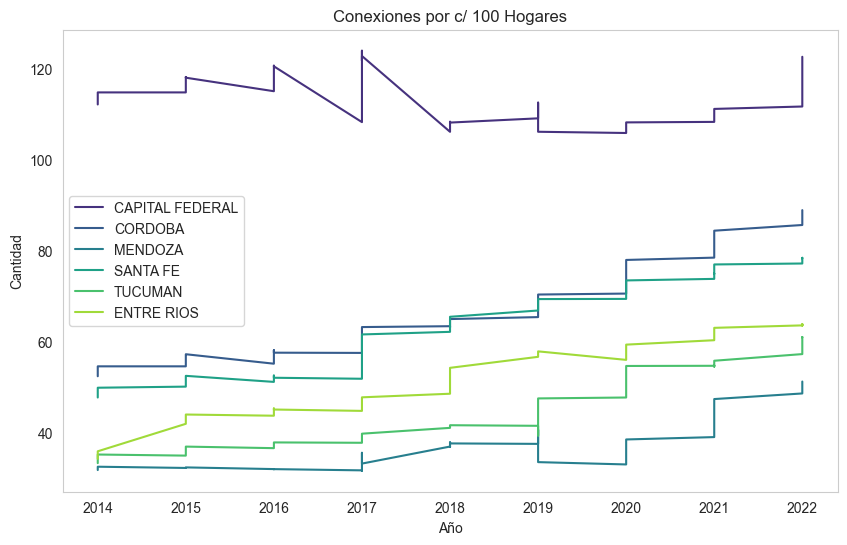

In [76]:
# Llamamos a la funcion
graficar_ingresos_por_provincia(df9, ['CAPITAL FEDERAL','CORDOBA', 'MENDOZA', 'SANTA FE', 'TUCUMAN', 'ENTRE RIOS'])

# 10 - Acceso por cada 100 Habitantes

In [77]:
df10 = pd.read_csv('datasets/datasetsGraph/Internet_Penetracion.csv')

df10.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,"77,21","24,15",Oct-Dic 2022
1,2022,3,"76,64","23,95",Jul-Sept 2022
2,2022,2,"75,97","23,72",Abr-Jun 2022
3,2022,1,"73,88","23,05",Ene-Mar 2022
4,2021,4,"73,18","22,81",Oct-Dic 2021


In [78]:
# Se observa que la columna de accesos por cada 100 hogares, es una metrica.
# Por lo tanto, los valores almacenados son decimales.

# Procedemos con el reemplazo de la coma por el punto, y de tipo float.
df10['Accesos por cada 100 hogares'] = df10['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)
df10['Accesos por cada 100 hab'] = df10['Accesos por cada 100 hab'].str.replace(',', '.').astype(float)

# Eliminamos la columna Periodo
df10.drop(columns='Periodo', inplace=True)


df10.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2022,4,77.21,24.15
1,2022,3,76.64,23.95
2,2022,2,75.97,23.72
3,2022,1,73.88,23.05
4,2021,4,73.18,22.81


### Graficamos

El gráfico histórico presenta la cantidad de accesos por cada 100 habitantes a lo largo del tiempo.

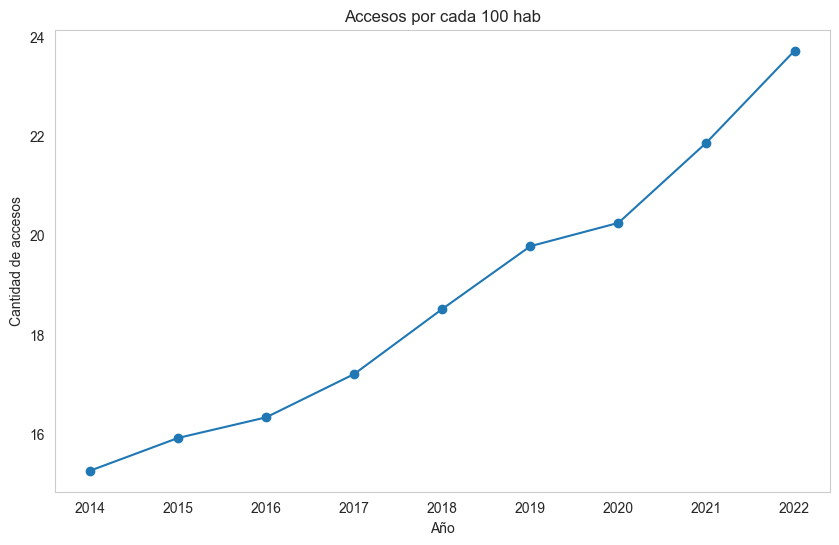

In [79]:
# Agrupar por año y sumar los ingresos por año
df_agrupado = df10.groupby('Año')['Accesos por cada 100 hab'].mean().reset_index()

# Graficar los datos en un gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(df_agrupado['Año'], df_agrupado['Accesos por cada 100 hab'], marker='o')

plt.title('Accesos por cada 100 hab')
plt.xlabel('Año')
plt.ylabel('Cantidad de accesos')
plt.grid(False)
plt.show()